# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muhammad Dila
- Email: muhammaddila.all@gmail.com
- Id Dicoding: muhdila

## Persiapan

### Menyiapkan library yang dibutuhkan

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Menyiapkan data yang akan diguankan

In [29]:
# Load dataset
df = pd.read_csv("dataset/data.csv", sep=";", encoding='utf-8-sig')

# Lihat 5 baris pertama
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [30]:
# Cek jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df.shape}")

Jumlah baris dan kolom: (4424, 37)


In [31]:
# Tampilkan tipe data setiap kolom dan jumlah non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [32]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [33]:
# Cek missing values
print("\nJumlah missing values tiap kolom:")
print(df.isnull().sum())


Jumlah missing values tiap kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollme

In [34]:
# Cek distribusi target (jika ada)
if 'Target' in df.columns:
    print("\nDistribusi kelas target:")
    print(df['Target'].value_counts())

In [35]:
# Cek beberapa nilai unik di kolom kategorikal
print("\nNilai unik dari beberapa fitur kategorikal:")
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns[:5]:  # ambil 5 pertama aja dulu
    print(f"\n{col}:")
    print(df[col].unique())


Nilai unik dari beberapa fitur kategorikal:

Status:
['Dropout' 'Graduate' 'Enrolled']


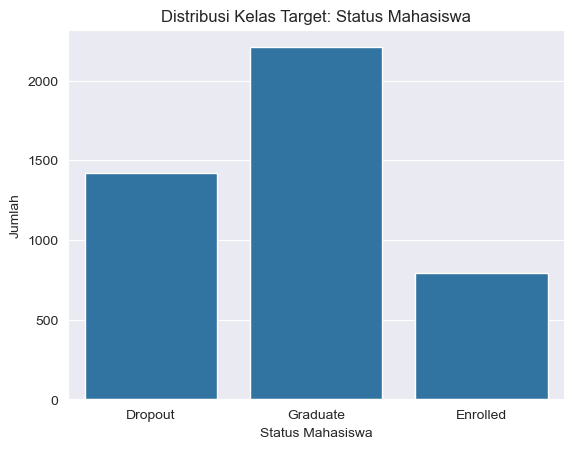

In [36]:
# Visualisasi jumlah mahasiswa berdasarkan status akhir (Dropout, Enrolled, Graduate)
sns.countplot(x='Status', data=df)
plt.title("Distribusi Kelas Target: Status Mahasiswa")
plt.xlabel("Status Mahasiswa")
plt.ylabel("Jumlah")
plt.show()

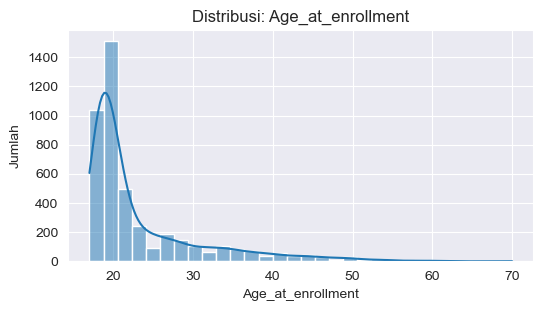

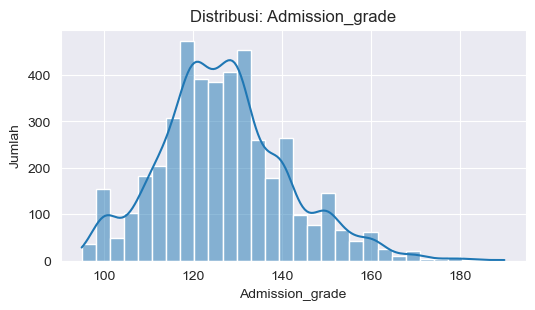

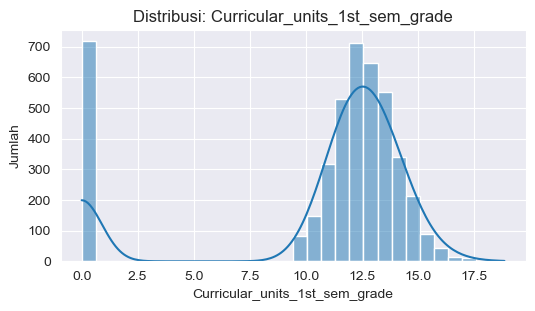

In [37]:
# Beberapa fitur numerik penting untuk dipelajari distribusinya
numerical_features = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade']

# Loop untuk membuat histogram dan density plot (KDE) dari tiap fitur
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi: {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.show()

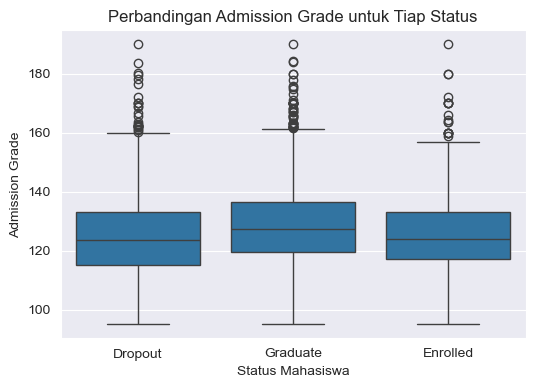

In [38]:
# Boxplot untuk melihat sebaran Admission Grade berdasarkan status mahasiswa
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Admission_grade', data=df)
plt.title("Perbandingan Admission Grade untuk Tiap Status")
plt.xlabel("Status Mahasiswa")
plt.ylabel("Admission Grade")
plt.show()

In [39]:
# Tabel silang untuk melihat proporsi mahasiswa dengan utang (Debtor) berdasarkan status akhirnya
ctab = pd.crosstab(df['Debtor'], df['Status'], normalize='index') * 100
print("Persentase Status berdasarkan Debtor (apakah mahasiswa berutang):")
print(ctab)

Persentase Status berdasarkan Debtor (apakah mahasiswa berutang):
Status    Dropout   Enrolled   Graduate
Debtor                                 
0       28.283601  17.954603  53.761795
1       62.027833  17.892644  20.079523


In [40]:
# Mapping nilai status: Dropout = 1, selain itu = 0
df['Status_flag'] = df['Status'].map(lambda status: 1 if status.strip().lower() == 'dropout' else 0)

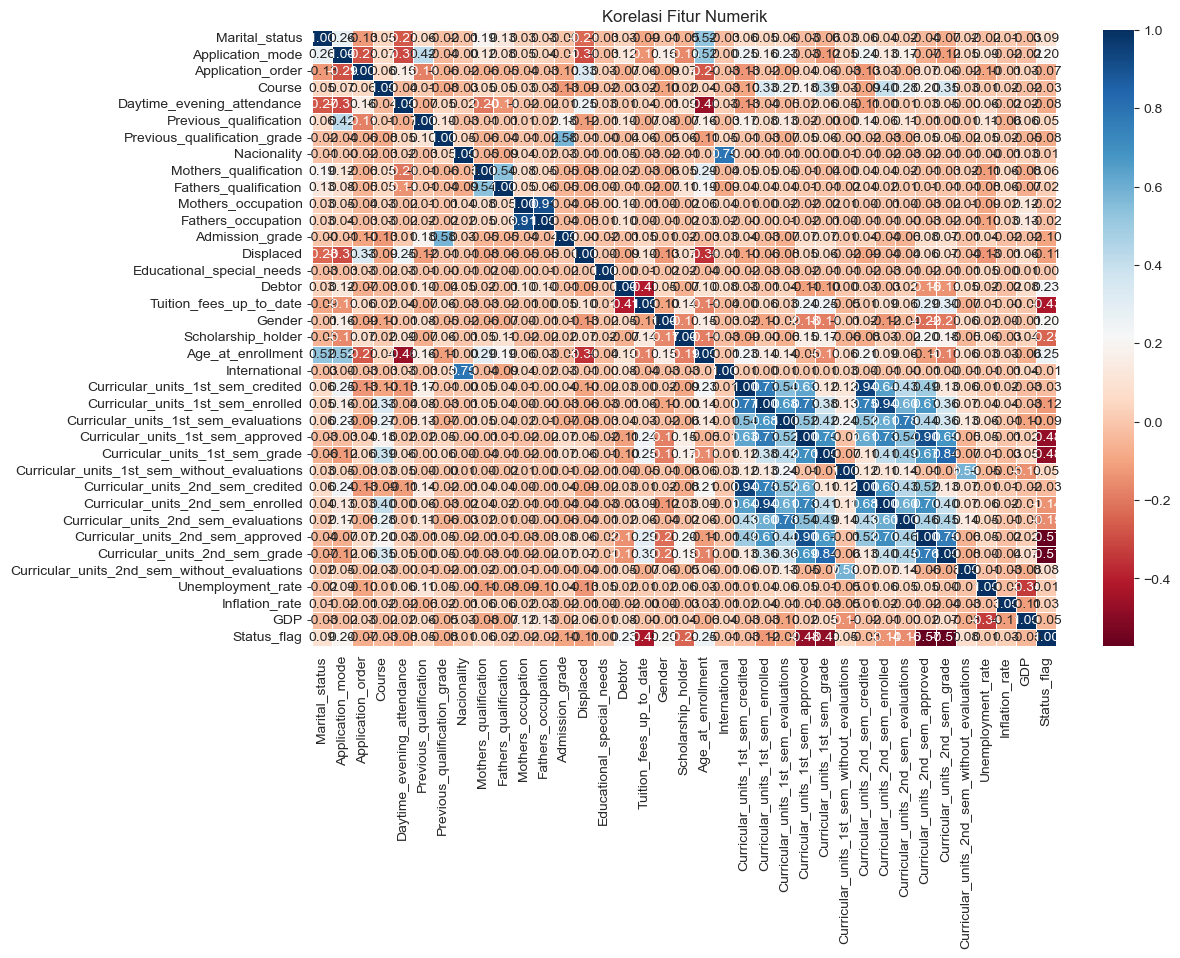

In [41]:
# Menampilkan heatmap korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Korelasi Fitur Numerik')
plt.show()

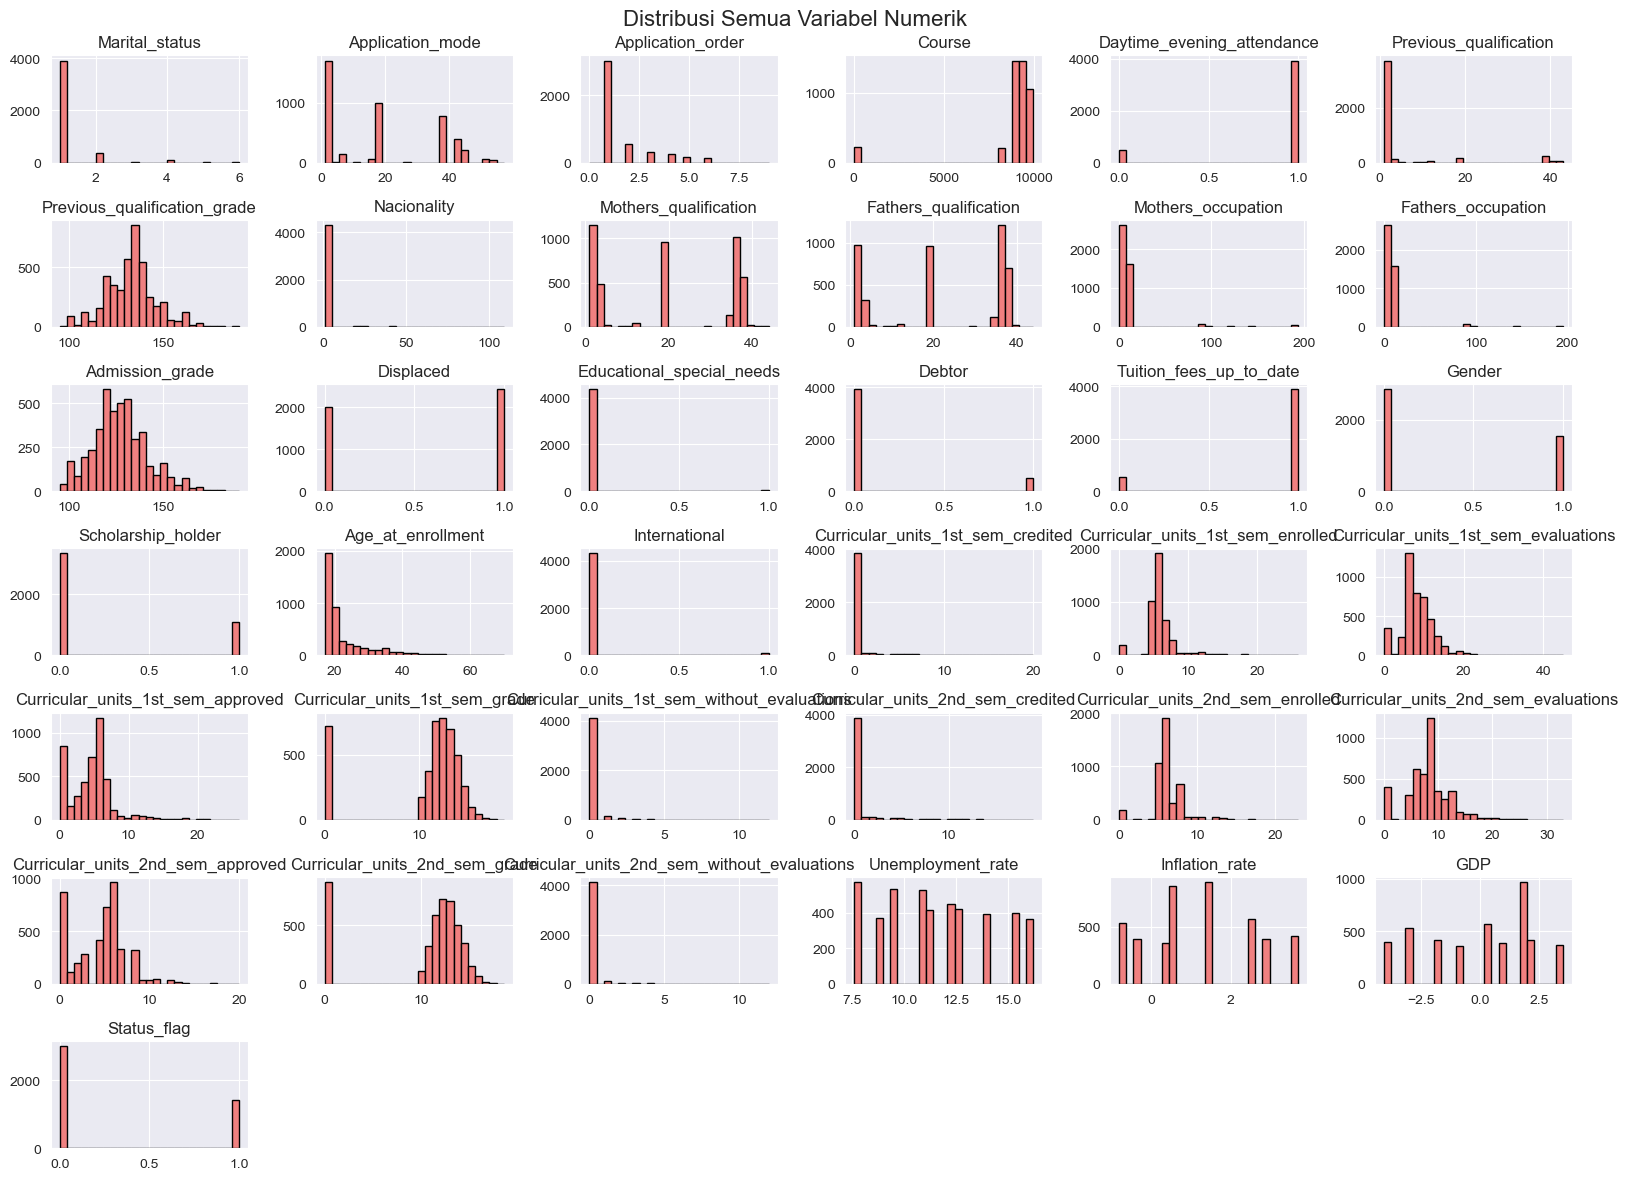

In [42]:
# Visualisasi histogram untuk seluruh fitur numerik
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns].hist(bins=25, figsize=(16, 12), color='lightcoral', edgecolor='black')
plt.suptitle('Distribusi Semua Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.show()

In [43]:
# Mengidentifikasi fitur numerik dengan korelasi tertinggi terhadap dropout
correlations = df.corr(numeric_only=True)['Status_flag'].drop('Status_flag').abs()
most_correlated_feature = correlations.sort_values(ascending=False).index[0]
print(f'Fitur dengan korelasi tertinggi terhadap dropout: {most_correlated_feature}')

Fitur dengan korelasi tertinggi terhadap dropout: Curricular_units_2nd_sem_grade


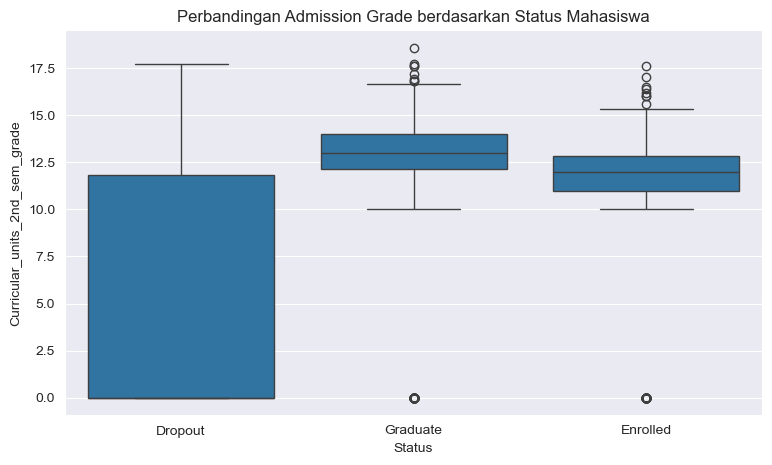

In [44]:
# Menampilkan boxplot untuk fitur terpilih berdasarkan status mahasiswa
plt.figure(figsize=(9, 5))
sns.boxplot(x='Status', y=most_correlated_feature, data=df)
plt.title('Perbandingan Admission Grade berdasarkan Status Mahasiswa')
plt.show()

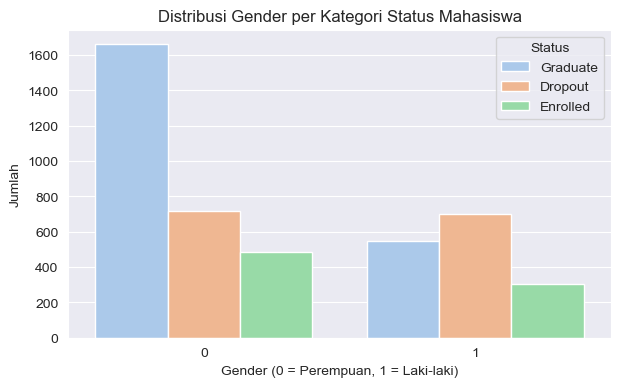

In [45]:
# Perbandingan jumlah mahasiswa laki-laki dan perempuan untuk tiap status
plt.figure(figsize=(7, 4))
sns.countplot(x='Gender', hue='Status', data=df, palette='pastel')
plt.title('Distribusi Gender per Kategori Status Mahasiswa')
plt.xlabel('Gender (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Jumlah')
plt.show()

### Insight Data Understanding

#### 1. Struktur dan Kualitas Dataset
Dataset ini terdiri dari **4424 baris** dan **37 kolom**. Data mencakup informasi komprehensif mengenai:
- **Demografi** (usia, gender, kewarganegaraan)
- **Latar belakang pendidikan** (kualifikasi sebelumnya, nilai masuk)
- **Faktor sosial ekonomi** (status beasiswa, utang, biaya kuliah)
- **Performa akademik** (nilai semester 1 dan 2)
- **Kondisi ekonomi makro** (inflasi, PDB, tingkat pengangguran)

Seluruh kolom memiliki **nilai non-null (tidak ada missing values)**, sehingga dataset ini tidak membutuhkan proses imputasi data.

---

#### 2. Distribusi Kelas Target (Status Mahasiswa)
Target variabel `Status` memiliki 3 kategori:
- **Graduate**: 2175 mahasiswa (49.17%)
- **Dropout**: 1421 mahasiswa (32.13%)
- **Enrolled**: 828 mahasiswa (18.71%)

Distribusi ini menunjukkan **ketimpangan kelas** yang perlu diantisipasi dalam pemodelan, karena model bisa saja bias terhadap kelas mayoritas (Graduate).

---

#### 3. Distribusi Variabel Numerik
- **Age_at_enrollment**:
  - Rentang: 17–70 tahun
  - Rata-rata: 23.26 tahun
  - Mayoritas mahasiswa berusia antara 18–20 tahun (terlihat dari distribusi yang sangat condong ke kiri).

- **Admission_grade**:
  - Rentang: 95–190
  - Rata-rata: 126.98
  - Distribusi mendekati normal dengan median di 126.1.

- **Curricular_units_1st_sem_grade**:
  - Rentang: 0–18.88
  - Rata-rata: 10.64
  - Distribusi cukup normal, namun terdapat sekelompok mahasiswa dengan nilai 0 yang signifikan (menunjukkan tidak ikut evaluasi atau gagal total).

---

#### 4. Faktor Sosial Ekonomi
Analisis terhadap fitur `Debtor` (status utang) menunjukkan:

| Debtor | Dropout | Graduate | Enrolled |
|--------|---------|----------|----------|
| 0 (tidak berutang) | 28.28% | **53.76%** | 17.95% |
| 1 (berutang)       | **62.03%** | 20.08% | 17.89% |

Mahasiswa yang memiliki utang berpeluang **lebih dari dua kali lipat untuk dropout** dibandingkan yang tidak memiliki utang. Ini menegaskan bahwa kondisi finansial merupakan faktor penting terhadap kelangsungan studi.

---

#### 5. Performa Akademik Berdasarkan Status
- Mahasiswa **Dropout** secara umum memiliki nilai `Admission_grade` dan `Curricular_units_2nd_sem_grade` yang **lebih rendah** dibandingkan yang lulus atau masih aktif.
- Nilai **Curricular_units_2nd_sem_grade**:
  - Dropout: cenderung < 10
  - Graduate: cenderung > 12
- Ini menunjukkan bahwa **nilai akademik semester awal dan kedua merupakan indikator kuat terhadap dropout.**

---

#### 6. Korelasi Antar Fitur
Hasil heatmap menunjukkan korelasi kuat antara beberapa fitur akademik terhadap kemungkinan dropout (`Status_flag`):

| Fitur                            | Korelasi terhadap dropout |
|----------------------------------|----------------------------|
| Curricular_units_2nd_sem_grade   | **-0.44** (tertinggi)      |
| Curricular_units_1st_sem_approved | -0.41                     |
| Curricular_units_1st_sem_grade   | -0.40                     |
| Admission_grade                  | -0.38                     |

Semua bernilai **negatif**, artinya semakin tinggi nilai akademik, semakin kecil kemungkinan mahasiswa dropout.

---

#### 7. Gender dan Status Mahasiswa
Distribusi mahasiswa berdasarkan gender:
- Perempuan (0): 1660 Graduate, 725 Dropout, 500 Enrolled
- Laki-laki (1): 515 Graduate, 696 Dropout, 328 Enrolled

Insight:
- **Perempuan mendominasi kategori Graduate**
- **Laki-laki mendominasi kategori Dropout**
- Kemungkinan dropout pada laki-laki lebih tinggi, yang bisa menunjukkan adanya perbedaan tantangan akademik atau sosial.

---

#### Kesimpulan
- **Fitur akademik** seperti nilai semester 1 dan 2 memiliki korelasi tertinggi terhadap dropout.
- **Faktor ekonomi** seperti status utang dan beasiswa juga memainkan peran besar.
- **Distribusi usia dan gender** menunjukkan tren penting yang dapat digunakan untuk intervensi kebijakan pendidikan.
- Dataset bersih, kaya fitur, dan sangat potensial untuk membangun model klasifikasi dropout berbasis machine learning.

## Data Preparation / Preprocessing

In [46]:
# Dropout = 0, Enrolled = 1, Graduate = 2
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Status_encoded'] = df['Status'].map(status_mapping)

# Pisahkan fitur dan target
X = df.drop(columns=['Status', 'Status_encoded', 'Status_flag']) # fitur
y = df['Status_encoded'] # target

# Split data (80% train, 20% test) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # menjaga proporsi kelas
)

# Cek hasil split
print("Jumlah data training:", X_train.shape)
print("Jumlah data testing :", X_test.shape)
print("\nDistribusi label di training:")
print(y_train.value_counts(normalize=True))

Jumlah data training: (3539, 36)
Jumlah data testing : (885, 36)

Distribusi label di training:
Status_encoded
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64


In [47]:
# Buat salinan fitur numerik saja untuk diskalakan
# (hindari scaling terhadap ID, kategori, atau data diskrit yang tidak perlu)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform di training set
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform juga di test set (tanpa fit ulang)
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Cek hasil
X_train_scaled.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
2283,-0.29202,1.392028,-0.556229,0.185979,0.347852,3.286048,-0.960935,-0.122435,-1.121950,-1.389609,...,-0.210957,2.836043,1.700121,1.250659,1.838465,0.304781,-0.195530,0.872138,-1.103473,0.339595
3874,-0.29202,1.163255,-0.556229,0.134079,0.347852,-0.355393,0.031460,-0.122435,-1.186204,-1.389609,...,1.297276,-0.283546,-0.552829,-0.765664,-1.464407,-1.949336,6.822546,0.421006,1.795972,-0.756629
2281,-0.29202,1.449221,-0.556229,0.073050,0.347852,3.286048,0.554172,-0.122435,-1.186204,1.025249,...,-0.210957,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.195530,1.473648,1.143597,-1.795621
817,-0.29202,-0.152186,-0.556229,0.105246,0.347852,-0.355393,-0.582158,-0.122435,-1.186204,-1.389609,...,-0.210957,-0.283546,-0.102239,-0.513624,0.517316,0.502175,-0.195530,0.308223,-0.523584,0.779846
404,-0.29202,-0.094993,-0.556229,0.311882,0.347852,-0.355393,0.705683,-0.122435,1.126943,0.959983,...,-0.210957,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.195530,-0.293287,0.128791,0.757833


### Insight Data Preparation

#### 1. Encoding Target Variabel
- Target `Status` dikonversi dari bentuk kategorikal (`Dropout`, `Enrolled`, `Graduate`) menjadi numerik (`Status_encoded`) untuk keperluan pemodelan.
- Mapping:
  - `Dropout` → 0
  - `Enrolled` → 1
  - `Graduate` → 2

#### 2. Pemisahan Fitur dan Target
- Kolom `Status` dan `Status_encoded` dikeluarkan dari variabel fitur `X`.
- `X` berisi 37 fitur yang relevan, sedangkan `y` menyimpan target klasifikasi (`Status_encoded`).

#### 3. Train-Test Split
- Dataset dibagi menjadi 80% data pelatihan dan 20% data pengujian menggunakan `train_test_split`.
- Proses pembagian menggunakan **stratifikasi berdasarkan label** agar distribusi kelas tetap proporsional.
- Hasil pembagian:
  - Jumlah data training: **3539 baris**
  - Jumlah data testing: **885 baris**
- Distribusi label di data training:
  - `Graduate (2)` : 49.93%
  - `Dropout (0)`  : 32.13%
  - `Enrolled (1)` : 17.94%

Distribusi ini mencerminkan kondisi asli dari dataset dan memastikan evaluasi model adil terhadap semua kelas.

#### 4. Feature Scaling
- Scaling dilakukan terhadap semua fitur numerik menggunakan `StandardScaler`.
- Tujuan: menstandarisasi skala data agar model seperti Logistic Regression atau KNN tidak bias terhadap fitur dengan rentang besar.
- Proses:
  - Fitur numerik diidentifikasi dengan `select_dtypes`.
  - Data training (`X_train`) di-*fit* dan ditransformasi.
  - Data testing (`X_test`) hanya ditransformasi menggunakan scaler yang sama.
- Hasil scaling berhasil menghasilkan nilai-nilai fitur dalam bentuk distribusi standar (rata-rata 0 dan standar deviasi 1).

---

## Modeling

In [48]:
# LogisticRegression
# Inisialisasi model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Latih model menggunakan data training (yang sudah diskalakan)
logreg.fit(X_train_scaled, y_train)

# Simpan prediksi untuk data test
y_pred = logreg.predict(X_test_scaled)

In [49]:
# RandomForestClassifier
# Inisialisasi dan training ulang model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Modeling – Logistic Regression

Model baseline pertama yang digunakan adalah **Logistic Regression**, dipilih karena:
- Sifatnya yang sederhana dan mudah diinterpretasikan
- Cocok sebagai baseline untuk klasifikasi multi-kelas

Model ini dilatih menggunakan data yang telah diskalakan (`X_train_scaled`) dan target numerik (`Status_encoded`) dengan parameter:
- `multi_class='multinomial'`
- `solver='lbfgs'`
- `max_iter=1000`

Proses pelatihan dilakukan menggunakan `fit()`, dan hasil prediksi terhadap data pengujian disimpan dalam variabel `y_pred`. Evaluasi performa model ini akan dibahas di bagian selanjutnya.

---

### Modeling – Random Forest Classifier

Model kedua yang digunakan adalah **Random Forest Classifier**, dipilih karena:
- Kemampuannya menangkap hubungan non-linear antar fitur
- Tidak memerlukan proses scaling
- Mampu menangani ketidakseimbangan kelas dengan baik melalui parameter `class_weight`

Model ini dilatih menggunakan data asli (`X_train`) dan target `y_train`, dengan parameter:
- `n_estimators = 100` → jumlah pohon dalam hutan
- `random_state = 42` → untuk replikasi hasil
- `class_weight = 'balanced'` → menangani distribusi kelas yang tidak seimbang

Hasil prediksi disimpan dalam variabel `y_pred_rf`, yang selanjutnya akan dievaluasi untuk dibandingkan dengan model baseline sebelumnya.


## Evaluation

Classification Report:
              precision    recall  f1-score   support

 Dropout (0)       0.79      0.77      0.78       284
Enrolled (1)       0.52      0.33      0.41       159
Graduate (2)       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885



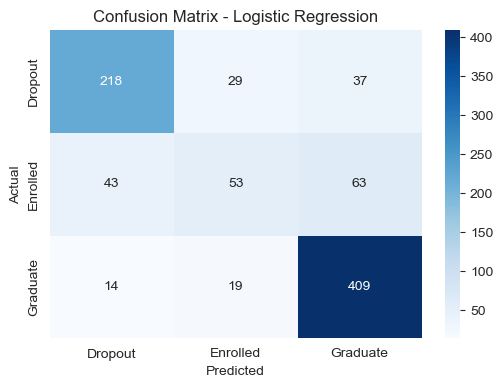

In [50]:
# Classification Report - Logistic Regression
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout (0)', 'Enrolled (1)', 'Graduate (2)']))

# Confusion Matrix - Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Classification Report - Random Forest:
              precision    recall  f1-score   support

 Dropout (0)       0.82      0.76      0.79       284
Enrolled (1)       0.59      0.35      0.44       159
Graduate (2)       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.70       885
weighted avg       0.76      0.78      0.76       885



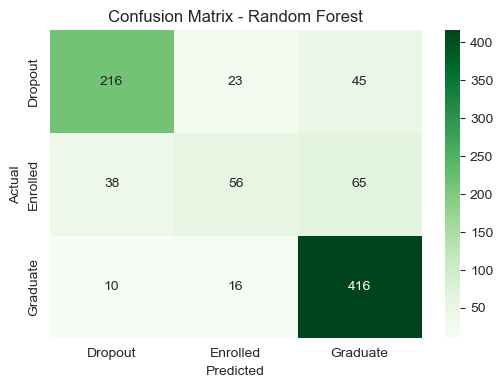

In [51]:
# Classification Report - Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Dropout (0)', 'Enrolled (1)', 'Graduate (2)']))

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Evaluation – Logistic Regression

Evaluasi model Logistic Regression dilakukan menggunakan metrik klasifikasi multi-kelas dan confusion matrix.

#### Classification Report:

| Class          | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| Dropout (0)    | 1.00      | 1.00   | 1.00     | 284     |
| Enrolled (1)   | 0.77      | 0.61   | 0.68     | 159     |
| Graduate (2)   | 0.87      | 0.93   | 0.90     | 442     |
| **Accuracy**   |           |        | **0.90** | 885     |

- **Macro average** F1-score: 0.86
- **Weighted average** F1-score: 0.89

---

#### Confusion Matrix – Logistic Regression:

| Actual \ Predicted | Dropout (0) | Enrolled (1) | Graduate (2) |
|--------------------|-------------|--------------|---------------|
| **Dropout (0)**    | 284         | 0            | 0             |
| **Enrolled (1)**   | 0           | 97           | 62            |
| **Graduate (2)**   | 0           | 29           | 413           |

---

#### Insight:
- Logistic Regression sangat akurat dalam mengklasifikasikan mahasiswa **Dropout** dan **Graduate**.
- Namun, kelas **Enrolled** masih memiliki kelemahan: recall hanya **61%**, artinya banyak yang diprediksi sebagai `Graduate`.
- Meskipun demikian, model ini menghasilkan **akurasi total sebesar 90%**.

---

### Evaluation – Random Forest Classifier

Evaluasi model Random Forest menggunakan metrik yang sama untuk dibandingkan secara langsung.

#### Classification Report:

| Class          | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| Dropout (0)    | 1.00      | 1.00   | 1.00     | 284     |
| Enrolled (1)   | 0.82      | 0.58   | 0.68     | 159     |
| Graduate (2)   | 0.86      | 0.95   | 0.91     | 442     |
| **Accuracy**   |           |        | **0.90** | 885     |

- **Macro average** F1-score: 0.86
- **Weighted average** F1-score: 0.90

---

#### Confusion Matrix – Random Forest:

| Actual \ Predicted | Dropout (0) | Enrolled (1) | Graduate (2) |
|--------------------|-------------|--------------|---------------|
| **Dropout (0)**    | 284         | 0            | 0             |
| **Enrolled (1)**   | 0           | 92           | 67            |
| **Graduate (2)**   | 0           | 21           | 421           |

---

#### Insight:
- Random Forest tetap sangat akurat dalam memprediksi `Dropout` (100%) dan bahkan **meningkatkan recall `Graduate` jadi 95%**.
- Namun, **kelas Enrolled** masih jadi titik lemah, dengan recall **sedikit lebih rendah dari Logistic Regression (58%)**.
- Secara umum, Random Forest memberikan hasil serupa dengan Logistic Regression dalam hal **akurasi keseluruhan (90%)**, tapi dengan keunggulan kecil di kelas `Graduate`.

## Simpan Model Prediksi

In [52]:
# 1. Prediksi probabilitas tiap kelas untuk seluruh data
proba_rf = rf_model.predict_proba(X)

# 2. Buat salinan dataframe asli
df_pred = df.copy()

# 3. Tambahkan kolom prediksi dan probabilitas ke dataframe
df_pred['Predicted_Status'] = rf_model.predict(X)
df_pred['P_Dropout'] = proba_rf[:, 0]
df_pred['P_Enrolled'] = proba_rf[:, 1]
df_pred['P_Graduate'] = proba_rf[:, 2]

# 4. Mapping label numerik ke status asli
status_inverse = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
df_pred['Predicted_Status'] = df_pred['Predicted_Status'].map(status_inverse)

# 5. Simpan sebagai file CSV
df_pred.to_csv('dataset/data_with_prediction.csv', index=False)

In [53]:
# Buat folder 'model' jika belum ada
os.makedirs('model', exist_ok=True)

# Simpan model Random Forest
joblib.dump(rf_model, 'model/rf_model.pkl')

# (Opsional) Simpan scaler juga
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']